In [1]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
# define llm object
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.0, max_retries=3)

In [4]:
# Define a class for the state data
class JokeState(TypedDict):
    
    topic: str
    joke: str
    explanation: str

In [5]:
# Define a finction to generate a joke
def generate_joke(state: JokeState):
    """Generate a joke based on the topic in the state."""
    topic = state['topic']
    prompt = f"Generate a joke about {topic}."
    response = llm.invoke(prompt).content
    
    return {'joke': response}    

In [6]:
# Define a function to generate an explanation
def generate_explanation(state: JokeState):
    """Generate an explanation for the joke in the state."""
    joke = state['joke']
    prompt = f"Explain this joke : {joke}."
    response = llm.invoke(prompt).content
    
    return {'explanation': response}

In [7]:
# Build the state graph
graph = StateGraph(JokeState)

# Add nodes to the graph
graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

# Add edges to the graph
graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

# Create a checkpointer to persist the state
checkpointer = InMemorySaver()

# Compile the graph with the checkpointer
workflow = graph.compile(checkpointer=checkpointer)

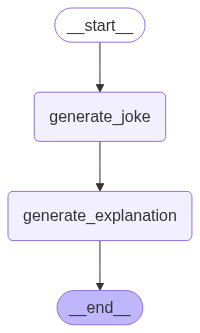

In [8]:
workflow

In [9]:
config1 = {'configurable': {'thread_id': "1"}}
initial_state = {
    "topic": "pizza"
    }
workflow.invoke(initial_state, config=config1)

{'topic': 'pizza',
 'joke': "Why did the pizza maker go broke?\n\nBecause he just couldn't make enough dough! 🍕",
 'explanation': 'This joke plays on a double meaning of the word "dough." \n\n1. **Literal Meaning**: In the context of pizza making, "dough" refers to the mixture of flour, water, and other ingredients that is used to make the crust of the pizza. A pizza maker needs to make a lot of dough to create pizzas.\n\n2. **Figurative Meaning**: "Dough" is also a slang term for money. When someone says they "can\'t make enough dough," it means they aren\'t earning enough money.\n\nSo, the humor comes from the pun on "dough"—the pizza maker is struggling both to produce enough pizza dough and to earn enough money, leading to the punchline that he went broke. The combination of these two meanings creates a light-hearted and clever play on words.'}

In [10]:
# Get the final values of the state
workflow.get_state(config=config1)

StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the pizza maker go broke?\n\nBecause he just couldn't make enough dough! 🍕", 'explanation': 'This joke plays on a double meaning of the word "dough." \n\n1. **Literal Meaning**: In the context of pizza making, "dough" refers to the mixture of flour, water, and other ingredients that is used to make the crust of the pizza. A pizza maker needs to make a lot of dough to create pizzas.\n\n2. **Figurative Meaning**: "Dough" is also a slang term for money. When someone says they "can\'t make enough dough," it means they aren\'t earning enough money.\n\nSo, the humor comes from the pun on "dough"—the pizza maker is struggling both to produce enough pizza dough and to earn enough money, leading to the punchline that he went broke. The combination of these two meanings creates a light-hearted and clever play on words.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f071c5b-ae82-686a-8002-d87b

In [11]:
# Get all the state values in the workflow
list(workflow.get_state_history(config=config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the pizza maker go broke?\n\nBecause he just couldn't make enough dough! 🍕", 'explanation': 'This joke plays on a double meaning of the word "dough." \n\n1. **Literal Meaning**: In the context of pizza making, "dough" refers to the mixture of flour, water, and other ingredients that is used to make the crust of the pizza. A pizza maker needs to make a lot of dough to create pizzas.\n\n2. **Figurative Meaning**: "Dough" is also a slang term for money. When someone says they "can\'t make enough dough," it means they aren\'t earning enough money.\n\nSo, the humor comes from the pun on "dough"—the pizza maker is struggling both to produce enough pizza dough and to earn enough money, leading to the punchline that he went broke. The combination of these two meanings creates a light-hearted and clever play on words.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f071c5b-ae82-686a-8002-d87

In [12]:
config2 = {'configurable': {'thread_id': '2'}}
initial_state = {
    "topic": "pasta"
}

workflow.invoke(initial_state, config=config2)

{'topic': 'pasta',
 'joke': 'Why did the pasta break up with the bread?\n\nBecause it kneaded space!',
 'explanation': 'This joke plays on a pun involving the words "kneaded" and "needed." \n\nIn baking, "kneading" is the process of working dough to develop gluten, which gives bread its structure. The joke anthropomorphizes pasta and bread, suggesting that the pasta is in a relationship with the bread. When the pasta says it "kneaded space," it sounds like it needs some distance or time alone, which is a common reason for breakups in relationships. \n\nThe humor comes from the clever wordplay and the unexpected twist of using baking terminology to describe a romantic situation.'}

In [13]:
workflow.get_state(config=config2)

StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta break up with the bread?\n\nBecause it kneaded space!', 'explanation': 'This joke plays on a pun involving the words "kneaded" and "needed." \n\nIn baking, "kneading" is the process of working dough to develop gluten, which gives bread its structure. The joke anthropomorphizes pasta and bread, suggesting that the pasta is in a relationship with the bread. When the pasta says it "kneaded space," it sounds like it needs some distance or time alone, which is a common reason for breakups in relationships. \n\nThe humor comes from the clever wordplay and the unexpected twist of using baking terminology to describe a romantic situation.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f071c5b-d24f-664e-8002-3e0962c1dd14'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '2'}, created_at='2025-08-05T06:30:54.429722+00:00', parent_config={'configurable': {'thread

In [14]:
list(workflow.get_state_history(config=config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta break up with the bread?\n\nBecause it kneaded space!', 'explanation': 'This joke plays on a pun involving the words "kneaded" and "needed." \n\nIn baking, "kneading" is the process of working dough to develop gluten, which gives bread its structure. The joke anthropomorphizes pasta and bread, suggesting that the pasta is in a relationship with the bread. When the pasta says it "kneaded space," it sounds like it needs some distance or time alone, which is a common reason for breakups in relationships. \n\nThe humor comes from the clever wordplay and the unexpected twist of using baking terminology to describe a romantic situation.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f071c5b-d24f-664e-8002-3e0962c1dd14'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '2'}, created_at='2025-08-05T06:30:54.429722+00:00', parent_config={'configurable': {'threa

## Time Travel

In [15]:
workflow.get_state({'configurable': {'thread_id': '1', 'checkpoint_id': '1f071c5b-76ad-61f6-8000-06a51f3c5884'}})

StateSnapshot(values={'topic': 'pizza'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f071c5b-76ad-61f6-8000-06a51f3c5884'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-05T06:30:44.821234+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f071c5b-76aa-6686-bfff-452b445c0e6b'}}, tasks=(PregelTask(id='9d576757-7d9d-e3da-a0a7-1aaad100ca9f', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': "Why did the pizza maker go broke?\n\nBecause he just couldn't make enough dough! 🍕"}),), interrupts=())

In [16]:
workflow.invoke(None, config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f071c5b-76ad-61f6-8000-06a51f3c5884'}})

{'topic': 'pizza',
 'joke': "Why did the pizza maker go broke?\n\nBecause he just couldn't make enough dough! 🍕",
 'explanation': 'This joke plays on a double meaning of the word "dough." \n\n1. **Literal Meaning**: In the context of pizza making, "dough" refers to the mixture of flour, water, and other ingredients that is used to make the crust of the pizza. A pizza maker needs to make a lot of dough to create pizzas.\n\n2. **Figurative Meaning**: "Dough" is also a slang term for money. When someone says they "can\'t make enough dough," it means they aren\'t earning enough money.\n\nSo, the humor comes from the pun on "dough"—the pizza maker is struggling both to make pizza dough and to earn enough money, leading to the punchline that he went broke. The combination of these two meanings creates a light-hearted and clever play on words.'}

In [17]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the pizza maker go broke?\n\nBecause he just couldn't make enough dough! 🍕", 'explanation': 'This joke plays on a double meaning of the word "dough." \n\n1. **Literal Meaning**: In the context of pizza making, "dough" refers to the mixture of flour, water, and other ingredients that is used to make the crust of the pizza. A pizza maker needs to make a lot of dough to create pizzas.\n\n2. **Figurative Meaning**: "Dough" is also a slang term for money. When someone says they "can\'t make enough dough," it means they aren\'t earning enough money.\n\nSo, the humor comes from the pun on "dough"—the pizza maker is struggling both to make pizza dough and to earn enough money, leading to the punchline that he went broke. The combination of these two meanings creates a light-hearted and clever play on words.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f071c6b-0589-6d0c-8002-b26304b78e30'

## Updating State

In [18]:
workflow.update_state({'configurable': {'thread_id': '1', 'checkpoint_id': '1f071c5b-76ad-61f6-8000-06a51f3c5884', 'checkpoint_ns': '' }}, {'topic': 'samosa'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f071c79-d351-6150-8001-30f9db2caf6c'}}

In [19]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f071c79-d351-6150-8001-30f9db2caf6c'}}, metadata={'source': 'update', 'step': 1, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-05T06:44:19.841664+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f071c5b-76ad-61f6-8000-06a51f3c5884'}}, tasks=(PregelTask(id='742e5d85-c044-0bec-a848-16bb6b2cce0d', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the pizza maker go broke?\n\nBecause he just couldn't make enough dough! 🍕", 'explanation': 'This joke plays on a double meaning of the word "dough." \n\n1. **Literal Meaning**: In the context of pizza making, "dough" refers to the mixture of flour, water, and other ingredients that is used to make the 

In [22]:
workflow.invoke(None, config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f071c79-d351-6150-8001-30f9db2caf6c'}})

{'topic': 'samosa',
 'joke': 'Why did the samosa go to school?\n\nBecause it wanted to be a little more "filling"!',
 'explanation': 'This joke plays on a pun involving the word "filling." \n\n1. **Samosa**: A samosa is a popular snack, typically a fried or baked pastry filled with a mixture of spiced potatoes, peas, or meat. The filling is the edible part inside the pastry.\n\n2. **School**: The joke suggests that the samosa goes to school to learn and gain knowledge, which is a common reason for attending school.\n\n3. **Pun on "filling"**: The humor comes from the double meaning of "filling." In one sense, it refers to the physical filling inside the samosa. In another sense, "filling" can mean being more knowledgeable or well-rounded, as in "being more fulfilling" in terms of education or personal growth.\n\nSo, the samosa wants to go to school to become more "filling" in both senses: to improve its literal filling and to gain knowledge, making it a clever play on words!'}

In [23]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': 'Why did the samosa go to school?\n\nBecause it wanted to be a little more "filling"!', 'explanation': 'This joke plays on a pun involving the word "filling." \n\n1. **Samosa**: A samosa is a popular snack, typically a fried or baked pastry filled with a mixture of spiced potatoes, peas, or meat. The filling is the edible part inside the pastry.\n\n2. **School**: The joke suggests that the samosa goes to school to learn and gain knowledge, which is a common reason for attending school.\n\n3. **Pun on "filling"**: The humor comes from the double meaning of "filling." In one sense, it refers to the physical filling inside the samosa. In another sense, "filling" can mean being more knowledgeable or well-rounded, as in "being more fulfilling" in terms of education or personal growth.\n\nSo, the samosa wants to go to school to become more "filling" in both senses: to improve its literal filling and to gain knowledge, making it a clever play 